In [7]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [8]:
# Download the dataset and read it into a pandas dataframe.

# The Brussels communes dataset was downloaded from Brussels open data website:  https://opendata.brussels.be
# https://opendata.brussels.be/explore/dataset/quartiers/table/?location=11,50.85516,4.37545&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6InF1YXJ0aWVycyIsIm9wdGlvbnMiOnt9fSwiY2hhcnRzIjpbeyJhbGlnbk1vbnRoIjp0cnVlLCJ0eXBlIjoiY29sdW1uIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiYXJlYW0yIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzY2YzJhNSJ9XSwieEF4aXMiOiJhcmVhbTIiLCJtYXhwb2ludHMiOjUwLCJzb3J0IjoiIn1dLCJ0aW1lc2NhbGUiOiIiLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlfQ%3D%3D
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/katja314/Capstone_project1/master/Brussels.csv
import pandas as pd
brussels = pd.read_csv('https://raw.githubusercontent.com/katja314/Capstone_project1/master/Brussels.csv', decimal=",",  delimiter=";")
brussels.tail()
#brussels.size



,No,French name,Dutch name,Postal code,Population,Area in km2,Population density,Latitude,Longitude
14,15,Schaerbeek,Schaarbeek,1030,133042,8.1,16.425,50.8674,4.3773
15,16,Uccle,Ukkel,1180,82307,22.9,3.594,50.8024,4.3407
16,17,Watermael-Boitsfort,Watermaal-Bosvoorde,1170,24871,12.9,1.928,50.7882,4.4180
17,18,Woluwe-Saint-Lambert,Sint-Lambrechts-Woluwe,1200,55216,7.2,7.669,50.8489,4.4321
18,19,Woluwe-Saint-Pierre,Sint-Pieters-Woluwe,1150,41217,8.9,4.631,50.8300,4.4335


In [9]:
#rename column
brussels.rename(columns={'French name': 'Neighborhood'}, inplace=True)
brussels

,No,Neighborhood,Dutch name,Postal code,Population,Area in km2,Population density,Latitude,Longitude
0,1,Anderlecht,Anderlecht,1070,118241,17.7,6680.000,50.8366,4.3082
1,2,Auderghem,Oudergem,1160,33313,9.0,3701.000,50.8164,4.4265
2,3,Berchem-Sainte-Agathe,Sint-Agatha-Berchem,1082,24701,2.9,8.518,50.8658,4.2926
3,4,Bruxelles-Ville,Stad Brussel,1000,176545,32.6,5.415,50.8428,4.3515
4,5,Etterbeek,Etterbeek,1040,47414,3.1,15.295,50.8326,4.3890
5,6,Evere,Evere,1140,40394,5.0,8.079,50.8739,4.4009
6,7,Forest,Vorst,1190,55746,6.2,8.991,50.8134,4.3248
7,8,Ganshoren,Ganshoren,1083,24596,2.5,9.838,50.8730,4.3093
8,9,Ixelles,Elsene,1050,86244,6.3,13.690,50.8333,4.3666
9,10,Jette,Jette,1090,51933,5.0,10.387,50.8809,4.3228


In [10]:
#drop the unnecessarry columns
brussels.drop(['No','Population','Area in km2','Population density'], axis=1, inplace=True)
brussels

,Neighborhood,Dutch name,Postal code,Latitude,Longitude
0,Anderlecht,Anderlecht,1070,50.8366,4.3082
1,Auderghem,Oudergem,1160,50.8164,4.4265
2,Berchem-Sainte-Agathe,Sint-Agatha-Berchem,1082,50.8658,4.2926
3,Bruxelles-Ville,Stad Brussel,1000,50.8428,4.3515
4,Etterbeek,Etterbeek,1040,50.8326,4.3890
5,Evere,Evere,1140,50.8739,4.4009
6,Forest,Vorst,1190,50.8134,4.3248
7,Ganshoren,Ganshoren,1083,50.8730,4.3093
8,Ixelles,Elsene,1050,50.8333,4.3666
9,Jette,Jette,1090,50.8809,4.3228


In [11]:
# Check the shape of the dataframe
brussels.shape

(19, 5)

__Use the geopy library to get the latitude and longitude values of Brussels__

In [12]:
# Retrieve the Latitude and Longitude for Brussels
from geopy.geocoders import Nominatim 

address = 'Brussels'

# Define the user_agent as Brussels_explorer
geolocator = Nominatim(user_agent="Brussels_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Brussels Belgium are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Brussels Belgium are 50.8465573, 4.351697.


Create a map of Brussels with different neighbourhoods

In [13]:

# create map of Brussels using the above latitude and longitude values
map_brussels = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(brussels['Latitude'], brussels['Longitude'], brussels['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_brussels)  
    
map_brussels

__Use the Foursquare API to explore the Arrondissements of Brussels (Neighborhoods)__

__Define Foursquare Credentials and Version__

In [14]:
CLIENT_ID = 'W0W14LPEVNMXXOSET3P0FDIILIHEZK1G12R52FYJELRARJE0' # your Foursquare ID
CLIENT_SECRET = 'VXOUPCWMZYJZPUHJGDQWINV2JOWJSTMPZJHMK2R4DIJXIFMR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: W0W14LPEVNMXXOSET3P0FDIILIHEZK1G12R52FYJELRARJE0
CLIENT_SECRET:VXOUPCWMZYJZPUHJGDQWINV2JOWJSTMPZJHMK2R4DIJXIFMR


In [15]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's name.

brussels.loc[0, 'Neighborhood']

'Anderlecht'

In [16]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = brussels.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = brussels.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = brussels.loc[0, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood Anderlecht are 50.8366, 4.3082.


In [17]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=W0W14LPEVNMXXOSET3P0FDIILIHEZK1G12R52FYJELRARJE0&client_secret=VXOUPCWMZYJZPUHJGDQWINV2JOWJSTMPZJHMK2R4DIJXIFMR&v=20180605&ll=50.8366,4.3082&radius=500&limit=100'

In [18]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed551f0963d29001b2ea80c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Anderlecht',
  'headerFullLocation': 'Anderlecht, Brussels',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 50.8411000045, 'lng': 4.31531220842311},
   'sw': {'lat': 50.832099995499995, 'lng': 4.30108779157689}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51b0aa91498ede57933cf6a2',
       'name': "Erasmushuis / Maison d'Erasme (Erasmushuis)",
       'location': {'address': 'Kapittelstraat 31 Rue du Chapitre',
        'lat': 50.836506855937664,
        'lng': 4.3078597589215715,
        'labeledLatLngs': [{'la

In [19]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Erasmushuis / Maison d'Erasme (Erasmushuis),History Museum,50.836507,4.307860
1,Le Chapeau Blanc,Restaurant,50.835034,4.307790
2,Taverne Restaurant Belle-Vue,Bar,50.834912,4.306885
3,Friture René,Belgian Restaurant,50.835846,4.311632
4,Snack Mirvan,Snack Place,50.835176,4.308543
5,C'est Si Bon,Bakery,50.834324,4.304310
6,Ulysse,Greek Restaurant,50.838612,4.306860
7,Le Prestige,Bar,50.838144,4.304794
8,Pâtisserie Chanson,Bakery,50.840428,4.305387
9,Proxy Delhaize,Supermarket,50.835486,4.305949


In [22]:
# Check how many venues there are in Anderlecht within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


__Create a nearby venues function for all the neighborhoods in Paris__


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
# Create a new dataframe called brussels_venues.

brussels_venues = getNearbyVenues(names=brussels['Neighborhood'],
                                   latitudes=brussels['Latitude'],
                                   longitudes=brussels['Longitude']
                                  )

Anderlecht
Auderghem
Berchem-Sainte-Agathe
Bruxelles-Ville
Etterbeek
Evere
Forest
Ganshoren
Ixelles
Jette
Koekelberg
Molenbeek-Saint-Jean
Saint-Gilles
Saint-Josse-ten-Noode
Schaerbeek
Uccle
Watermael-Boitsfort
Woluwe-Saint-Lambert
Woluwe-Saint-Pierre


In [25]:
print(brussels_venues.shape)
brussels_venues.head(250)

(543, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anderlecht,50.8366,4.3082,Erasmushuis / Maison d'Erasme (Erasmushuis),50.836507,4.307860,History Museum
1,Anderlecht,50.8366,4.3082,Le Chapeau Blanc,50.835034,4.307790,Restaurant
2,Anderlecht,50.8366,4.3082,Taverne Restaurant Belle-Vue,50.834912,4.306885,Bar
3,Anderlecht,50.8366,4.3082,Friture René,50.835846,4.311632,Belgian Restaurant
4,Anderlecht,50.8366,4.3082,Snack Mirvan,50.835176,4.308543,Snack Place
5,Anderlecht,50.8366,4.3082,C'est Si Bon,50.834324,4.304310,Bakery
6,Anderlecht,50.8366,4.3082,Ulysse,50.838612,4.306860,Greek Restaurant
7,Anderlecht,50.8366,4.3082,Le Prestige,50.838144,4.304794,Bar
8,Anderlecht,50.8366,4.3082,Pâtisserie Chanson,50.840428,4.305387,Bakery
9,Anderlecht,50.8366,4.3082,Proxy Delhaize,50.835486,4.305949,Supermarket


In [26]:
brussels_venues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anderlecht,30,30,30,30,30,30
Auderghem,42,42,42,42,42,42
Berchem-Sainte-Agathe,12,12,12,12,12,12
Bruxelles-Ville,58,58,58,58,58,58
Etterbeek,37,37,37,37,37,37
Evere,16,16,16,16,16,16
Forest,17,17,17,17,17,17
Ganshoren,23,23,23,23,23,23
Ixelles,36,36,36,36,36,36


In [27]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(brussels_venues['Venue Category'].unique())))

There are 163 unique venue categories.


In [28]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
brussels_onehot = pd.get_dummies(brussels_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brussels_onehot['Neighborhood'] = brussels_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brussels_onehot.columns[-1]] + list(brussels_onehot.columns[:-1])
brussels_onehot = brussels_onehot[fixed_columns]

brussels_onehot

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,...,Trattoria/Osteria,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store
0,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Anderlecht,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Anderlecht,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# The shape of the dataframe is
brussels_onehot.shape

(543, 164)

__Group rows by neighborhood and take the mean of the frequency of occurrence of each category__


In [30]:
brussels_grouped = brussels_onehot.groupby('Neighborhood').mean().reset_index()
brussels_grouped

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,...,Trattoria/Osteria,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store
0,Anderlecht,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Auderghem,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.023810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Berchem-Sainte-Agathe,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bruxelles-Ville,0.000000,0.017241,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000,0.000000,0.017241,0.000000,0.000000
4,Etterbeek,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.027027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Evere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Forest,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Ganshoren,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130435,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Ixelles,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,...,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000
9,Jette,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000


In [31]:
# The shape of the grouped data is
brussels_grouped.shape

(19, 164)

In [32]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in brussels_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brussels_grouped[brussels_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anderlecht----
                       venue  freq
0          Convenience Store  0.13
1                Supermarket  0.10
2                     Bakery  0.10
3                        Bar  0.10
4                 Restaurant  0.07
5           Greek Restaurant  0.07
6                      Plaza  0.07
7             History Museum  0.03
8              Metro Station  0.03
9  Middle Eastern Restaurant  0.03


----Auderghem----
                       venue  freq
0       Fast Food Restaurant  0.07
1            Thai Restaurant  0.05
2           Sushi Restaurant  0.05
3                Pizza Place  0.05
4          French Restaurant  0.05
5  Middle Eastern Restaurant  0.05
6                        Bar  0.05
7               Cocktail Bar  0.02
8                    Butcher  0.02
9               Carpet Store  0.02


----Berchem-Sainte-Agathe----
               venue  freq
0        Supermarket  0.17
1   Greek Restaurant  0.17
2           Pharmacy  0.08
3  French Restaurant  0.08
4        Snack Place  0.

In [33]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
brussels_venues_sorted = pd.DataFrame(columns=columns)
brussels_venues_sorted['Neighborhood'] = brussels_grouped['Neighborhood']

for ind in np.arange(brussels_grouped.shape[0]):
    brussels_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brussels_grouped.iloc[ind, :], num_top_venues)

brussels_venues_sorted.head(20)

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderlecht,Convenience Store,Supermarket,Bar,Bakery,Greek Restaurant,Restaurant,Plaza,Grocery Store,Metro Station,Concert Hall
1,Auderghem,Fast Food Restaurant,Thai Restaurant,French Restaurant,Sushi Restaurant,Bar,Middle Eastern Restaurant,Pizza Place,Ice Cream Shop,Bus Station,Butcher
2,Berchem-Sainte-Agathe,Supermarket,Greek Restaurant,Burger Joint,Plaza,Pharmacy,Asian Restaurant,Gym,Snack Place,Restaurant,French Restaurant
3,Bruxelles-Ville,Art Museum,Coffee Shop,French Restaurant,Bar,Hotel,Bookstore,Italian Restaurant,Middle Eastern Restaurant,Plaza,Brasserie
4,Etterbeek,Plaza,Snack Place,Gym,Supermarket,Bar,Sandwich Place,Cosmetics Shop,Portuguese Restaurant,Pool Hall,Pool
5,Evere,Bakery,Brasserie,Theater,Pizza Place,Restaurant,Sandwich Place,Bus Stop,Snack Place,Spa,Pharmacy
6,Forest,Park,Bar,Supermarket,Lounge,Movie Theater,Multiplex,Bookstore,Music Venue,Chinese Restaurant,Tennis Court
7,Ganshoren,Bakery,Pizza Place,Plaza,Bar,Bus Station,Friterie,Pool,Thai Restaurant,Park,Deli / Bodega
8,Ixelles,Italian Restaurant,Bakery,Bar,Wine Bar,Tea Room,Coffee Shop,Burger Joint,Café,Sandwich Place,Portuguese Restaurant
9,Jette,Bar,Park,Platform,Snack Place,Plaza,Gastropub,Performing Arts Venue,Music Venue,Restaurant,Bus Stop


In [35]:
# The shape of the sorted data is
brussels_venues_sorted.shape

(19, 11)

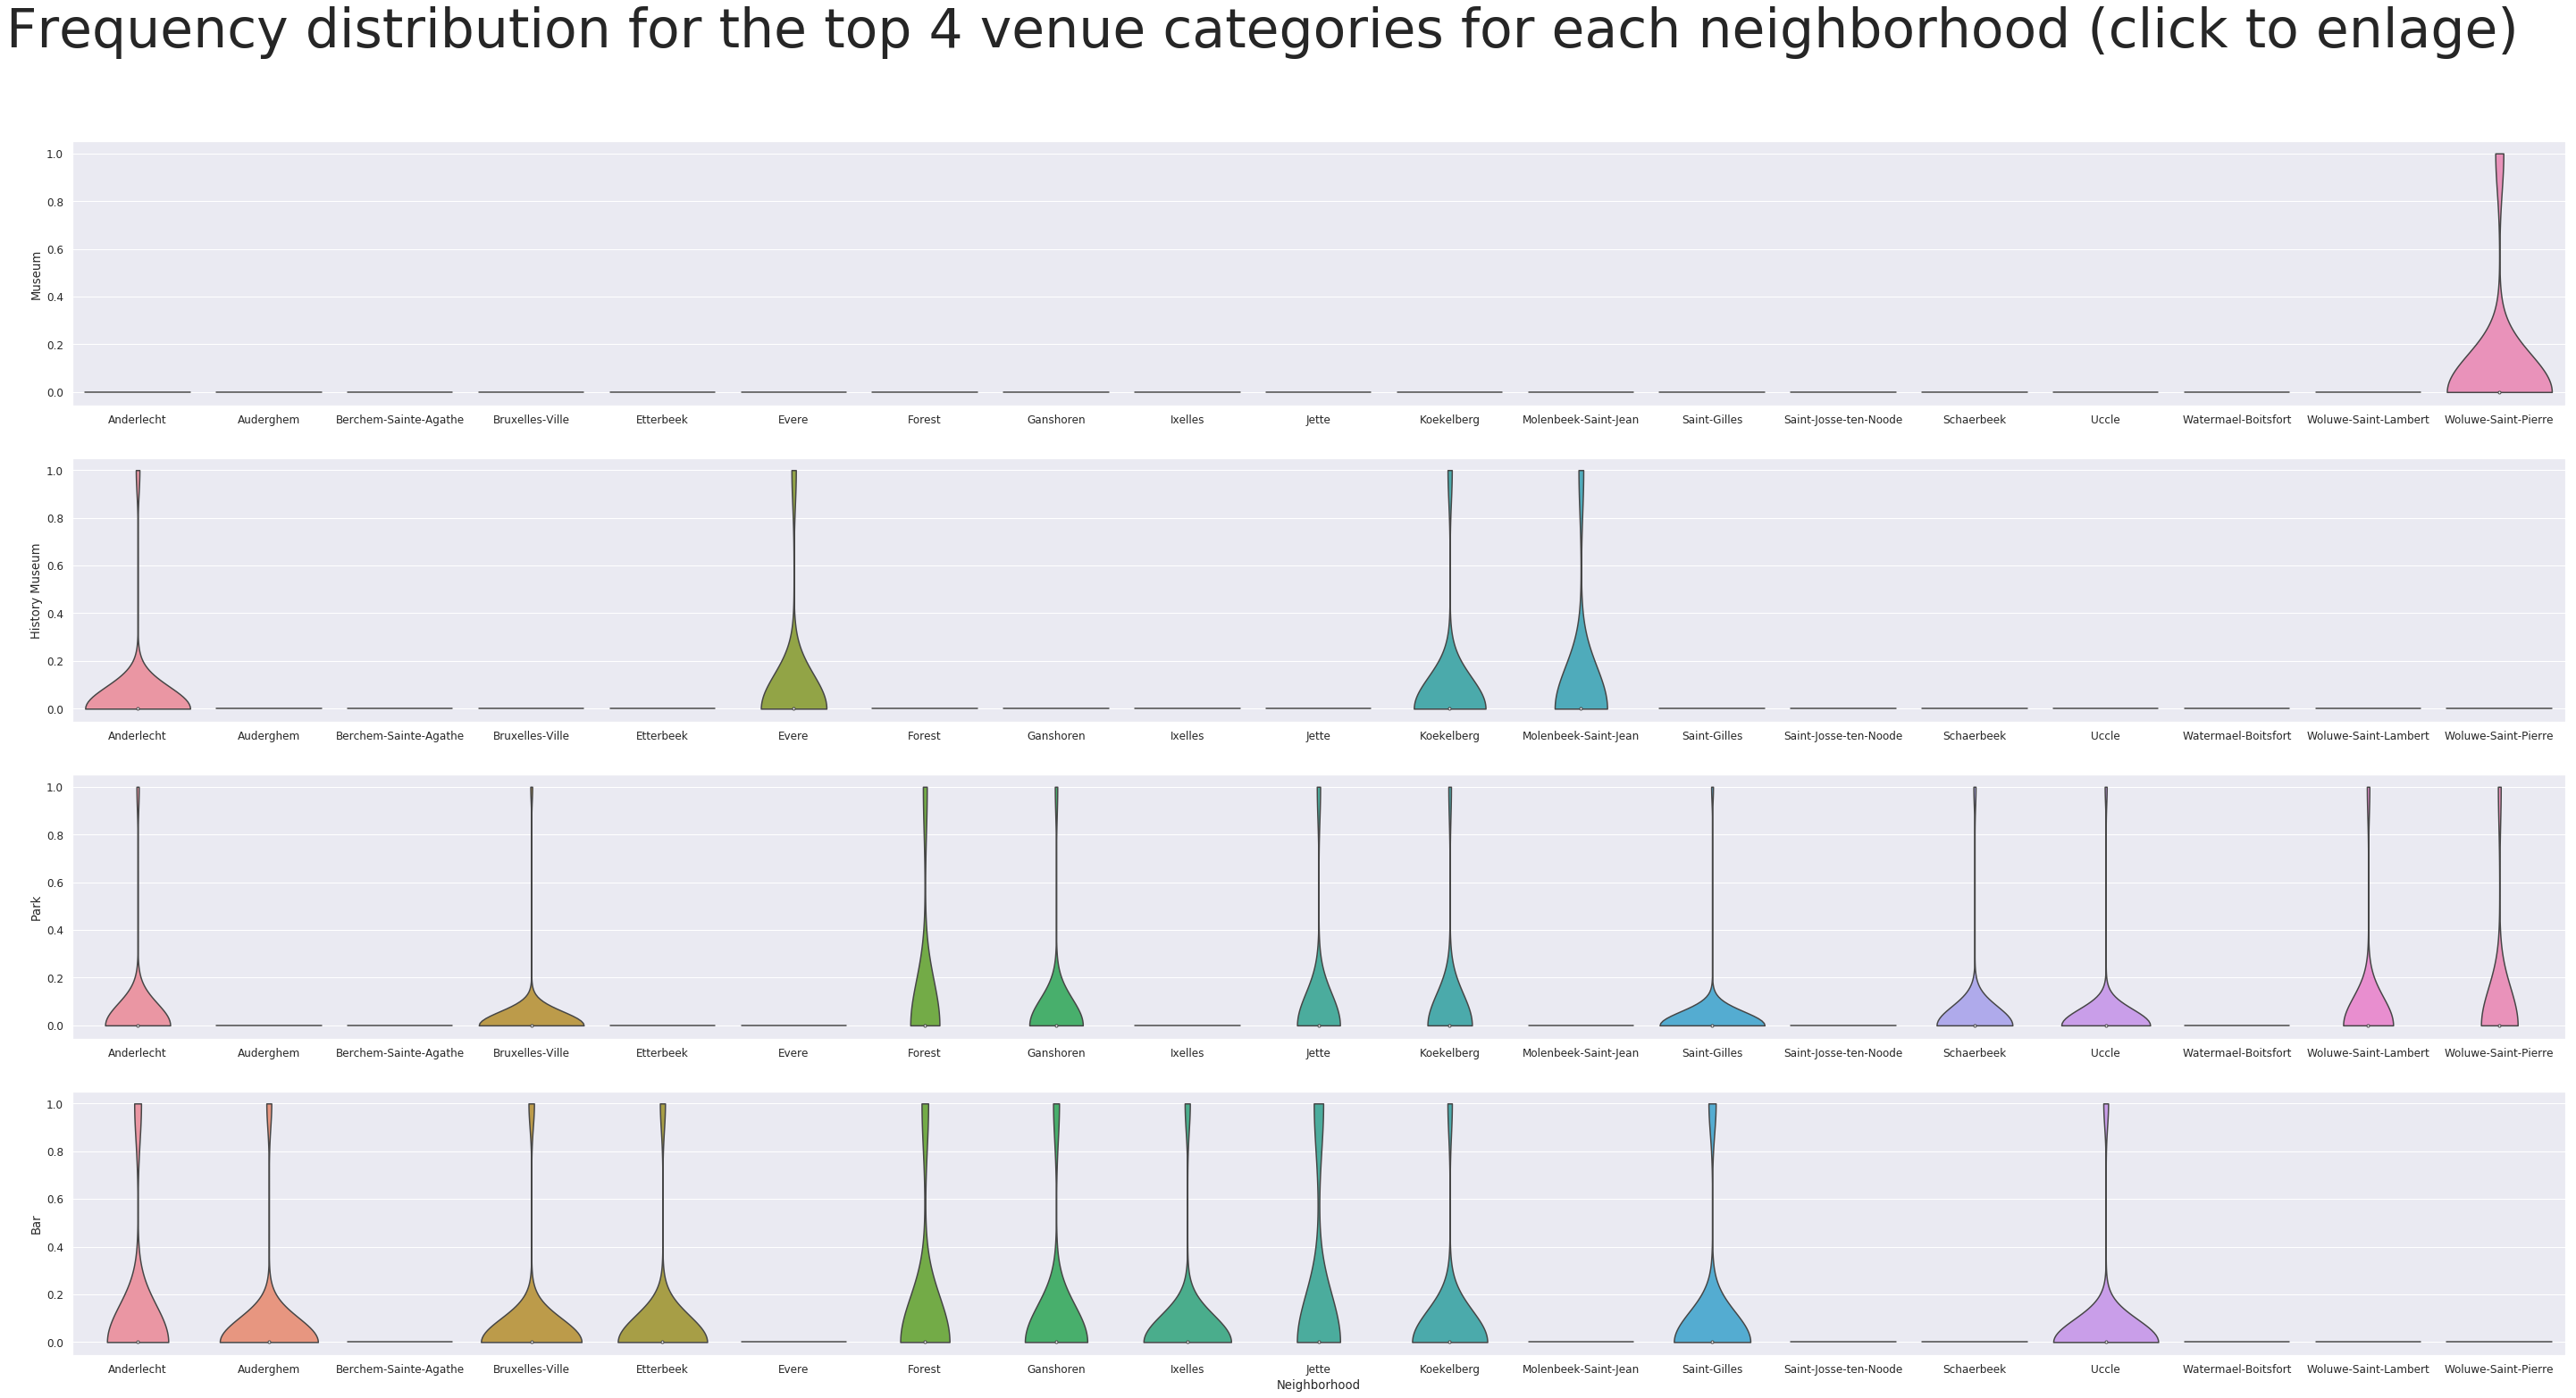

In [40]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="Museum", data=brussels_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="History Museum", data=brussels_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=brussels_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Bar", data=brussels_onehot, cut=0);

ax.text(-1.0, 4.1, 'Frequency distribution for the top 4 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_4_categories.png", dpi=240)
plt.show()

### The Neighborhoods
So as we can see from the analysis there are 2 neighborhoods to open new Greek restaurant - according to the criteria that they have the 3 specified venues in a great frequency  They are as follows: Anderlecht, Koekelberg

__Let's take this further with some exploration and Inferential Analysis__
We have the 2 neighborhoods that include 3 venue category criteria.
But if we included the 'Greek_Restaurant" venue category into the analysis, then we might be able to make some inferences based on the data, and domain knowledge of marketing and the industry, to focus the list.

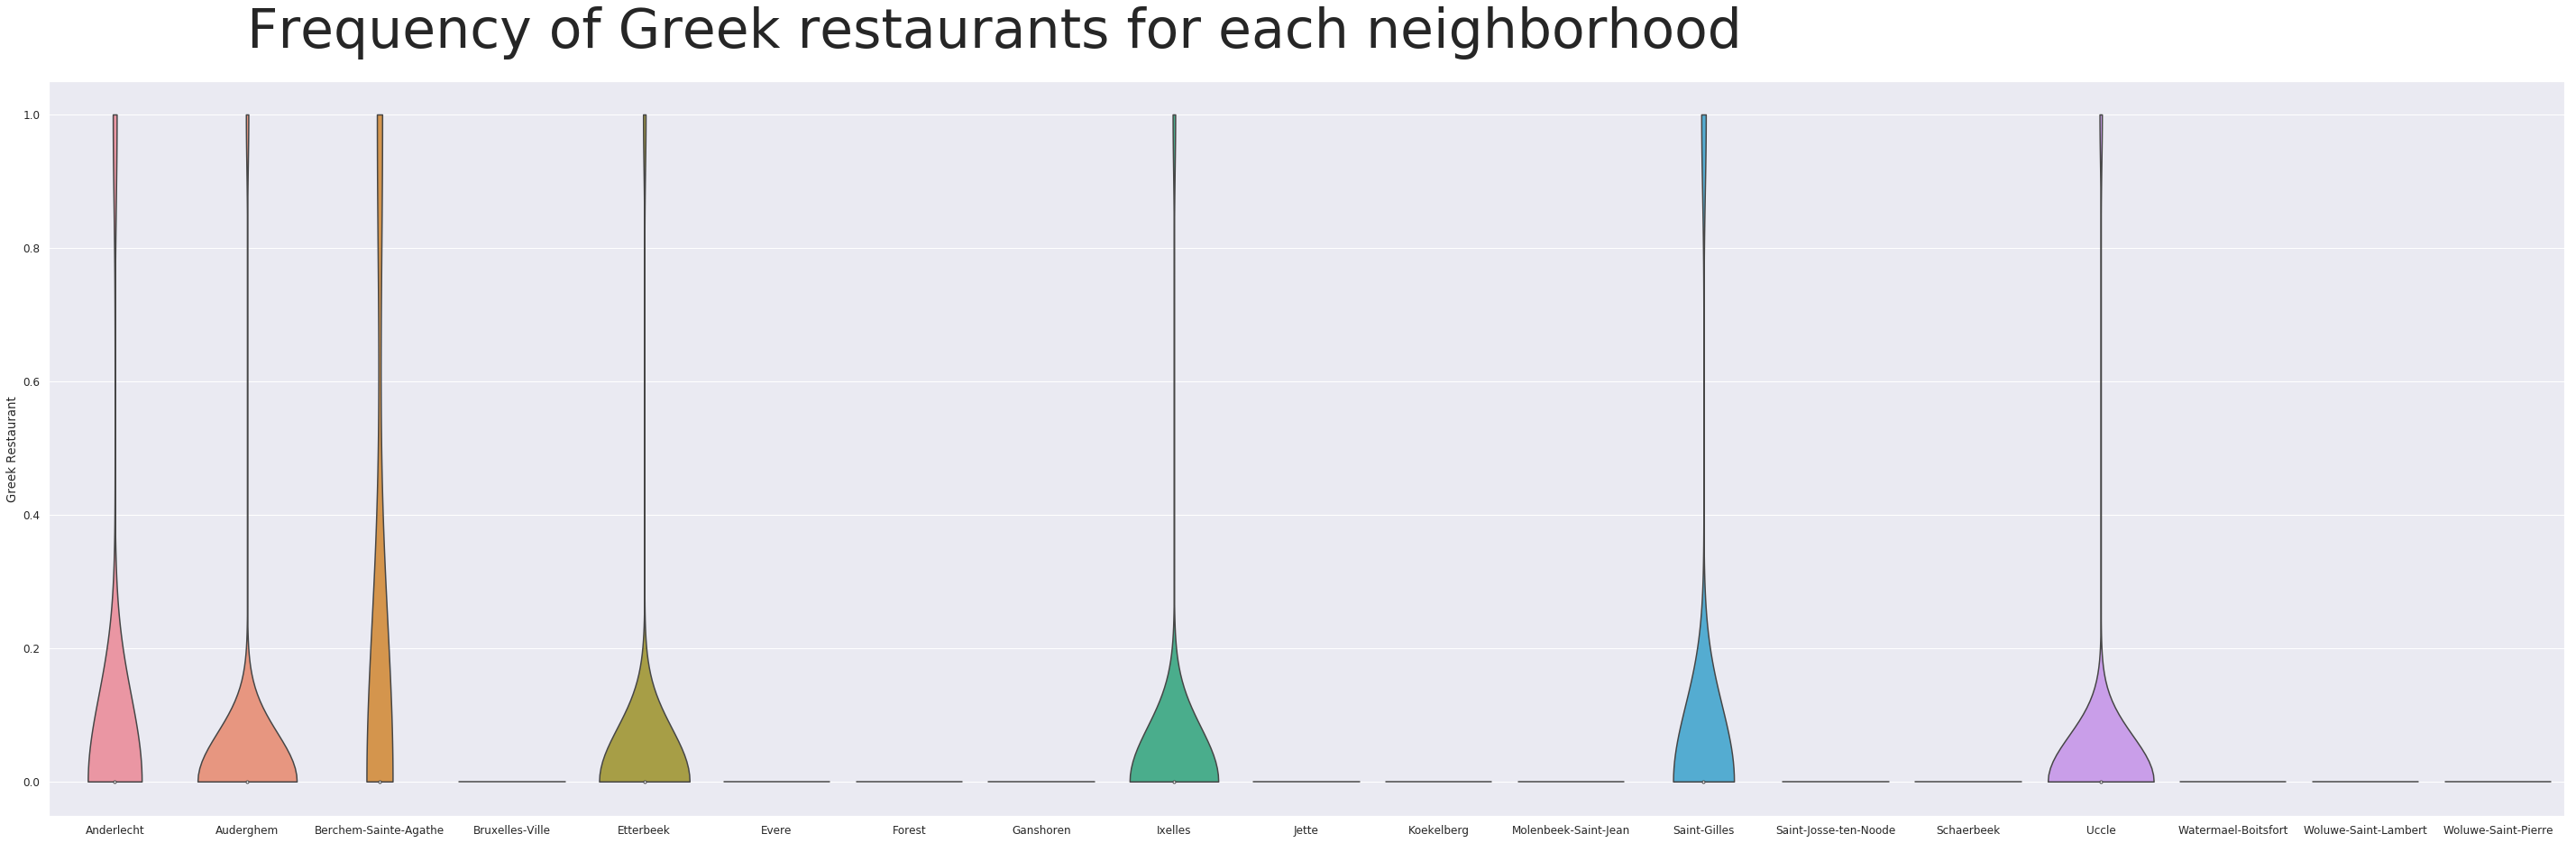

In [45]:
# Add the Greek_restaurant to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Greek Restaurant", data=brussels_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Greek restaurants for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Greek_restaurants.png", dpi=240)
plt.show()

So there are 7 neighborhoods that have a significant frequency density of Greek restaurants

### Let's add this to the analysis with the other 4 specified categories as below.

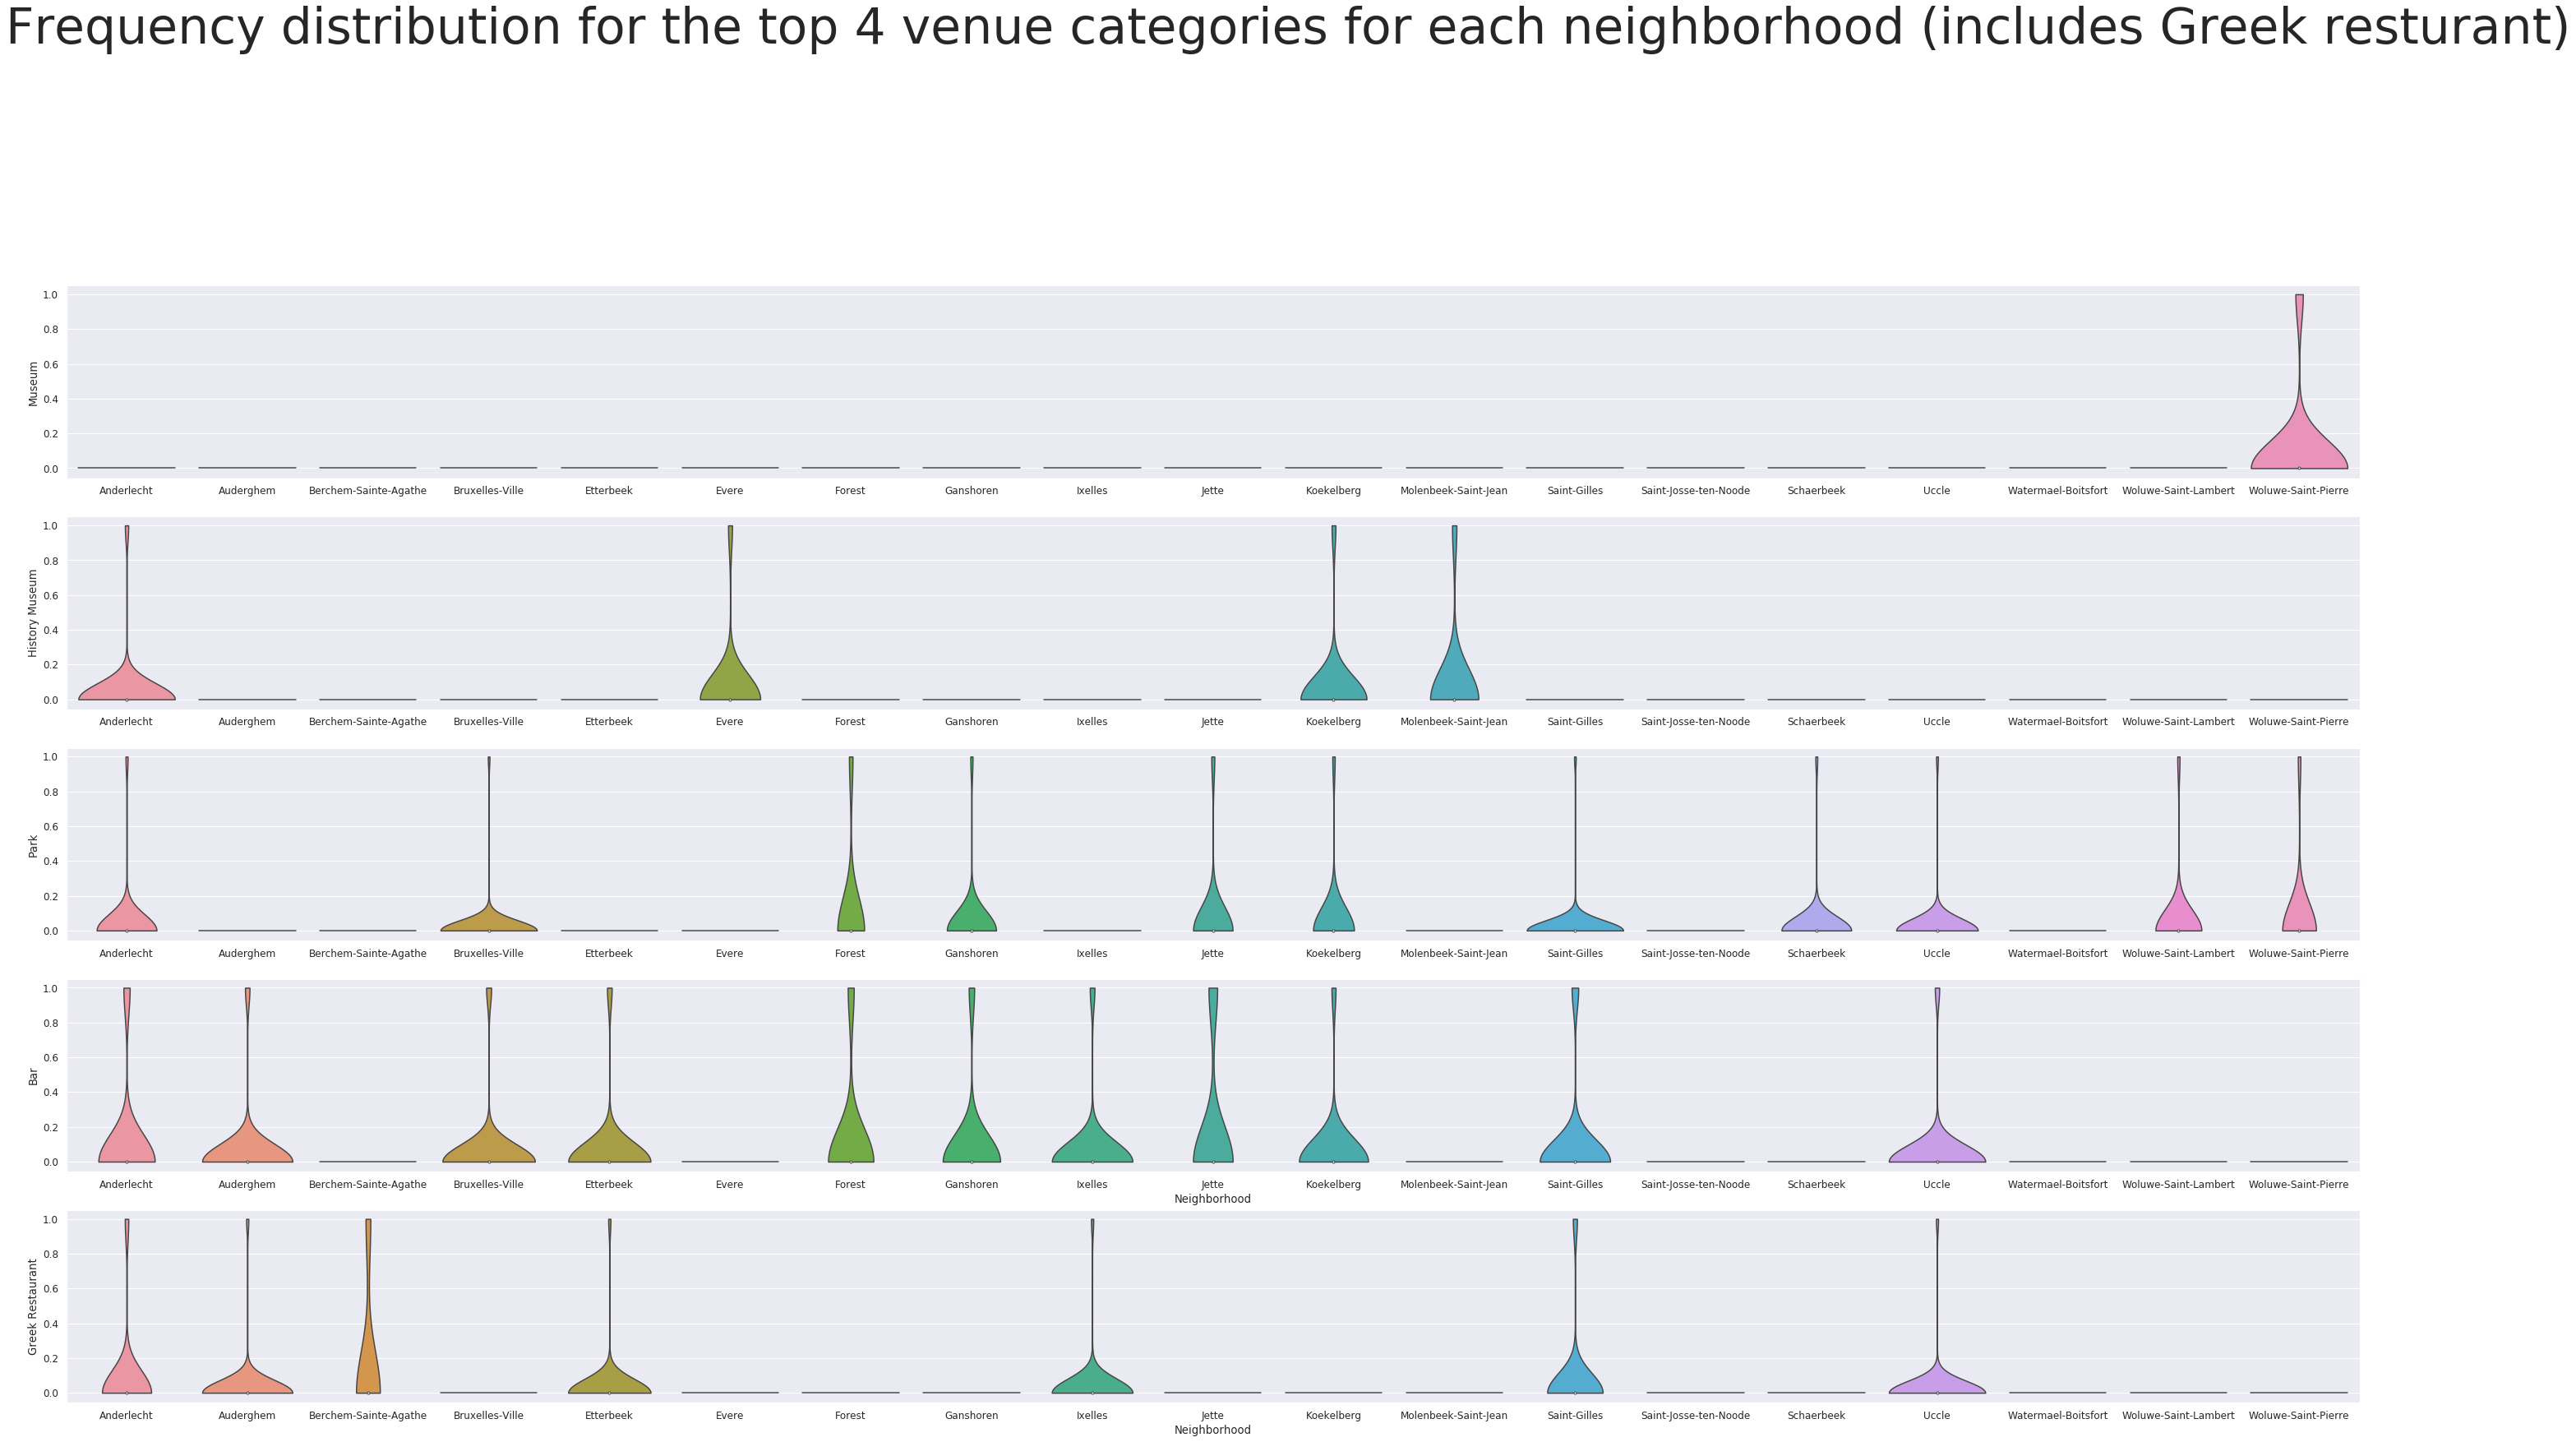

In [46]:
fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(5,1,1)
sns.violinplot(x="Neighborhood", y="Museum", data=brussels_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(5,1,2)
sns.violinplot(x="Neighborhood", y="History Museum", data=brussels_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(5,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=brussels_onehot, cut=0);
plt.xlabel("")

plt.subplot(5,1,4)
sns.violinplot(x="Neighborhood", y="Bar", data=brussels_onehot, cut=0);

plt.subplot(5,1,5)
sns.violinplot(x="Neighborhood", y="Greek Restaurant", data=brussels_onehot, cut=0);
ax.text(-1.0, 5.1, 'Frequency distribution for the top 4 venue categories for each neighborhood (includes Greek resturant)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_4_categories_Greek.png", dpi=240)
plt.show()

Inferential analysis using the data, as well as domain knowledge, allow the list to be focussed to just 1 neighbourhood from the previous 2 (Anderlecht and Koekelberg)

The reasoning being that if the 3 criteria have been met - identifying neighbourhoods that are lively with Museums, Parks and Bars - adding Greek resturants into the mix in the area is a bonus. Having some of the same category of restaurants in the Anferlecht neihbourhood and no Greek resturants in Koekelberg, we can advise that this would be the optimal area to open a new Greek resturant.


Thanks for taking part in my Data Science journey!